# **L'Analyse des Correspondances Multiples :**

 **l'objectif** :

L'Analyse des Composantes Multiples (ACM) est une méthode statistique utilisée pour explorer et visualiser les relations entre les variables qualitatives dans une base de données. Elle permet de réduire la complexité des données en identifiant et en sélectionnant les composantes principales, qui représentent les variables qualitatives avec un pourcentage indiquant leur influence respective. Cette technique est particulièrement utile pour simplifier l'interprétation des données et révéler les structures sous-jacentes dans des ensembles de données multidimensionnels.

**Création d'environnement de travail :**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince
# Configuration pour l'affichage des graphiques
sns.set_style("whitegrid")

**Importation de base de données :**

In [4]:
import pandas as pd
import prince

# Importation de données
df = pd.read_csv("STUDENT ATTITUDE AND BEHAVIOR .csv")

# prétraitement de base de donnée
indices_a_supprimer = [3,4,5,6,7,9,11,13,14,15]
df_categorical = df.drop(df.columns[indices_a_supprimer], axis=1)

#df_categorical = df.drop(columns=['Height(CM)', 'Weight(KG)','10th Mark','12th Mark','college mark','daily studing time','salary expectation'])
df_categorical

,Certification Course,Gender,Department,hobbies,prefer to study in,Do you like your degree?,Stress Level,Financial Status,part-time job
0,No,Male,BCA,Video Games,Morning,No,Bad,Bad,No
1,No,Female,BCA,Cinema,Morning,Yes,Bad,Bad,No
2,Yes,Male,BCA,Cinema,Anytime,Yes,Awful,Bad,No
3,Yes,Female,BCA,Reading books,Anytime,No,Bad,good,No
4,No,Male,BCA,Video Games,Morning,Yes,Good,good,No
...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,Video Games,Morning,Yes,Bad,Bad,No
231,Yes,Male,B.com ISM,Cinema,Anytime,Yes,Good,good,No
232,Yes,Female,BCA,Cinema,Night,Yes,Bad,good,No
233,Yes,Female,Commerce,Cinema,Anytime,Yes,Awful,good,No


**Prétraitemet de la base de donnée :**

In [8]:
# Prétraitement de la base de données
indices_a_supprimer = [3, 4, 5, 6, 7, 9, 11, 13, 14, 15]
df_categorical = df.drop(df.columns[indices_a_supprimer], axis=1)

**La méthode d'ACM :**

In [10]:
# Initialisation de l'ACM
mca = prince.MCA(n_components=2, random_state=42)

# Ajustement de l'ACM sur les données
mca = mca.fit(df_categorical)

# Transformation des données
transformed_data = mca.transform(df_categorical)

# Affichage des résultats
print("\nCoordonnées des individus sur les premiers axes factoriels :\n", transformed_data)

# Contributions des variables
variable_contributions = mca.column_coordinates(df_categorical)
print("\nCoordonnées des variables sur les premiers axes factoriels :\n", variable_contributions)



Coordonnées des individus sur les premiers axes factoriels :
             0         1
0    1.149494 -0.030742
1    0.101078 -0.243764
2    0.072812  0.310637
3   -0.068468  0.520761
4    0.461379 -0.645370
..        ...       ...
230  0.731937 -0.476416
231 -0.115712 -0.264101
232 -0.382573 -0.132440
233 -0.809832  0.223365
234  0.348971  0.598408

[235 rows x 2 columns]

Coordonnées des variables sur les premiers axes factoriels :
                                                  0         1
Certification Course_No                   0.610403 -0.215318
Certification Course_Yes                 -0.333312  0.117575
Gender_Female                            -0.879858 -0.022438
Gender_Male                               0.445569  0.011363
Department_B.com Accounting and Finance  -0.256702  0.945797
Department_B.com ISM                      0.738199 -0.295025
Department_BCA                            0.301732 -0.040597
Department_Commerce                      -0.944128 -0.009457
hobbies_Cinem

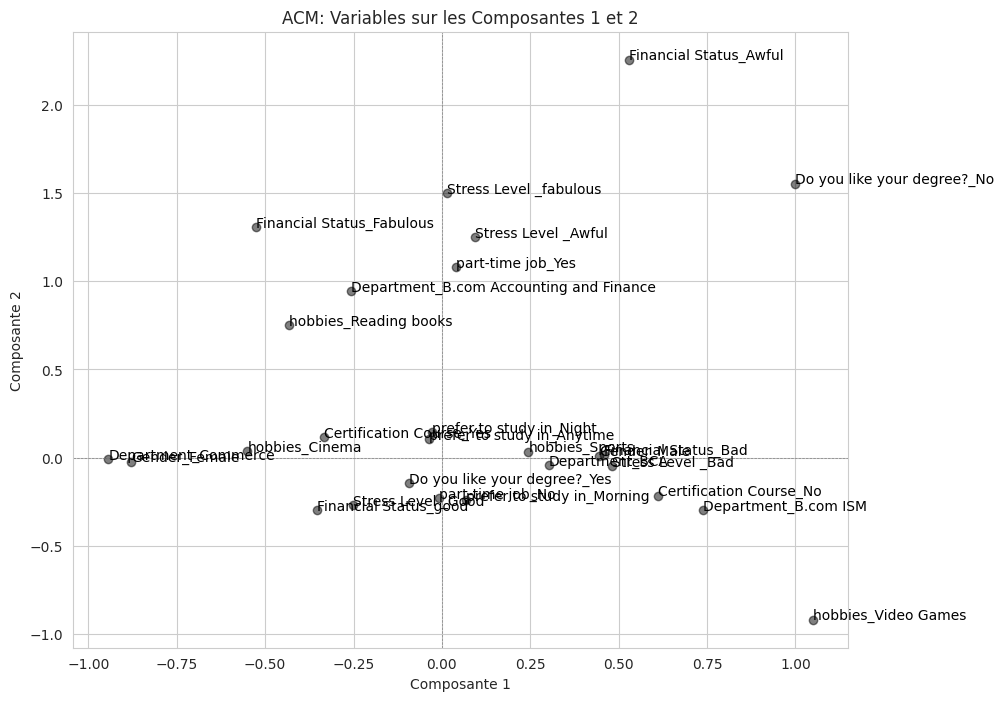

In [17]:
# Affichage de chaque variable en fonction des deux dimensions
fig, ax = plt.subplots(figsize=(10, 8))

# Plot des variables
ax.scatter(var_coords[0], var_coords[1], alpha=0.5, color='black', label='Variables')
for i, txt in enumerate(var_coords.index):
    ax.annotate(txt, (var_coords.iloc[i, 0], var_coords.iloc[i, 1]), color='black', fontsize=10)

plt.title('ACM: Variables sur les Composantes 1 et 2')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.show()

**INTERPRETATION :**

-La présentation visualise la répartition des données en fonction des deux composantes principales.

 -Plus la valeur d'une variable est proche du centre par rapport à une composante, moins cette variable influence la construction de cette composante, c'est-à-dire qu'elle a une très faible pondération. Par exemple, la valeur 'Sport' de la variable 'Hobbies' par rapport à la deuxième composante, et la valeur 'Commerce' de la variable 'Département' par rapport aux deux composantes.

  -Plus la valeur d'une variable est éloignée du centre par rapport à une composante, plus elle a une influence importante dans la construction de cette composante. Par exemple, la valeur 'No' de la variable 'Do you like your degree?' ou la valeur 'Awful' de la variable 'Financial Status'.

  -Les valeurs représentées dans la partie négative par rapport à une composante indiquent une pondération négative dans la construction de cette composante. Par exemple, la valeur 'NO' de la variable 'Certification Course' par rapport à la deuxième composante.



**Le cercle de corrélation :**

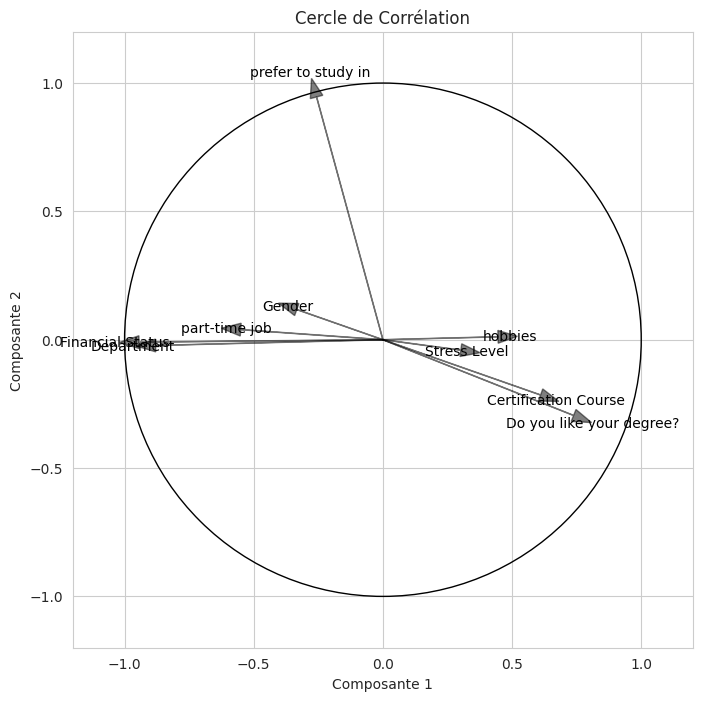

In [15]:
# Ajout du code pour le cercle de corrélation
def plot_correlation_circle(mca, labels=None):
    plt.figure(figsize=(8, 8))
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    for i, (var, comp) in enumerate(zip(labels, mca.column_coordinates(df_categorical).values)):
        plt.arrow(0, 0, comp[0], comp[1], color='black', alpha=0.5, head_width=0.05)
        plt.text(comp[0] * 1.1, comp[1] * 1.1, var, color='black', ha='center', va='center')
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title("Cercle de Corrélation")
    plt.grid(True)
    plt.show()

# Afficher le cercle de corrélation
plot_correlation_circle(mca, labels=df_categorical.columns)


**INTERPRETATION :**

Le cercle de corrélation est un moyen pour analyser et comprendre la nature des relations entre les variables observées entre elles et avec les deux composantes principales construites, à l'aide des indicateurs : la longueur et la direction des flèches, et l'angle avec les axes des composantes.

   La longueur des flèches représente la contribution de la variable à la variance expliquée par les composantes principales. La direction des flèches indique le type de corrélation, qu'elle soit 'négative' ou 'positive'. Par exemple, on trouve que la variable 'Gender' a une corrélation faible négative par rapport à la première composante et positive par rapport à la deuxième, tandis que les variables 'Department' et 'Financial Status' ont des pondérations négatives presque complètes avec la première composante, indiquant une forte corrélation négative avec la première composante et une absence de corrélation avec la deuxième composante.



**Étude détaillée des variables individuelles:**

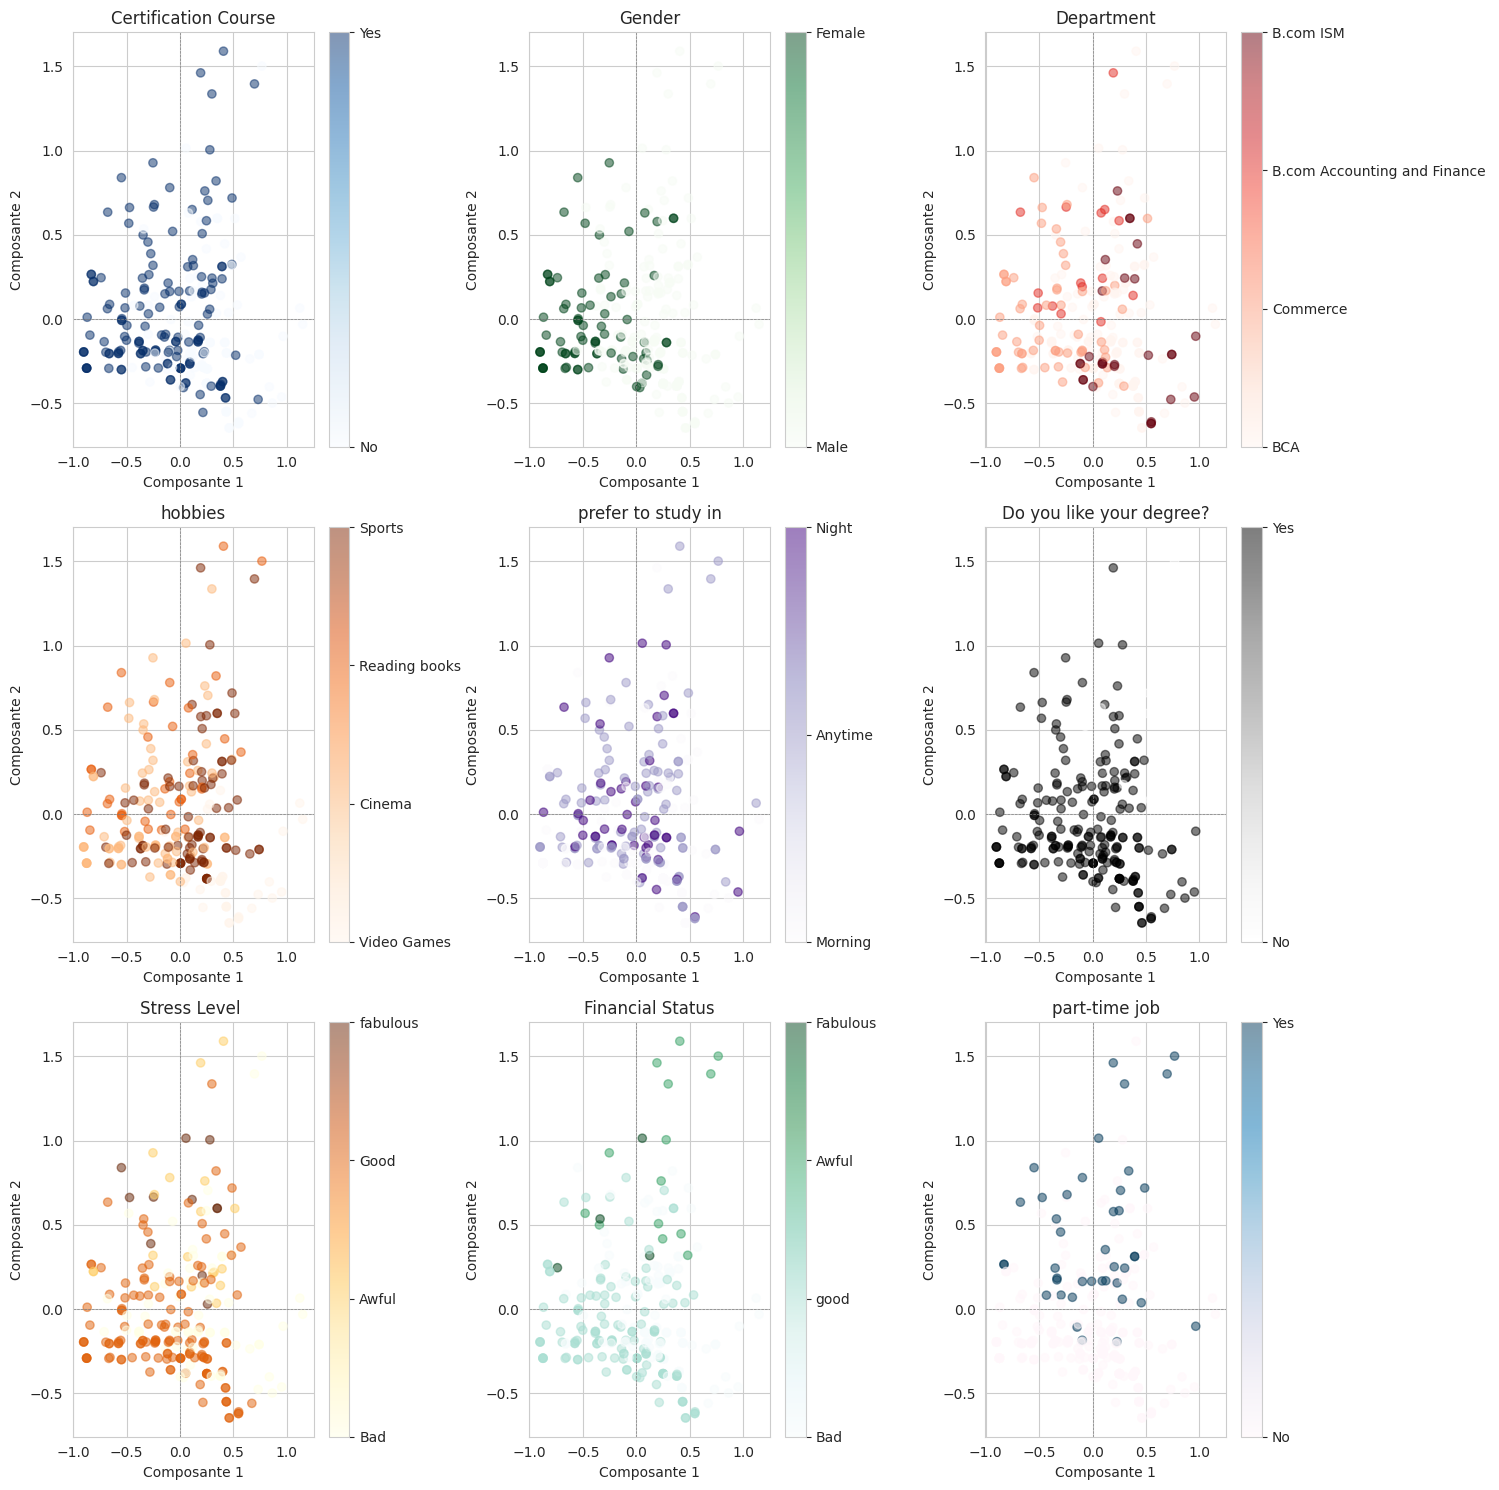

In [18]:
# Création de la grille pour les mini-graphiques
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Définition d'une liste de palettes de couleurs
palettes = ['Blues', 'Greens', 'Reds', 'Oranges', 'Purples', 'Greys', 'YlOrBr', 'BuGn', 'PuBu']

# Boucle sur les colonnes de la base de données
for i, (col, palette) in enumerate(zip(df_categorical.columns, palettes)):
    # Sélection des données de la colonne spécifique
    data_col = df_categorical[col]

    # Utilisation d'une échelle de couleur différente pour chaque mini-graphique
    ax = axes[i // 3, i % 3]  # Calcul des indices de la grille pour le sous-graphique actuel
    sc = ax.scatter(transformed_data[0], transformed_data[1], c=pd.factorize(data_col)[0], cmap=palette, alpha=0.5)
    ax.set_title(f"{col}")
    ax.set_xlabel("Composante 1")
    ax.set_ylabel("Composante 2")
    ax.grid(True)
    ax.axhline(0, color='grey', linestyle='--', linewidth=0.5)
    ax.axvline(0, color='grey', linestyle='--', linewidth=0.5)

    # Ajout de la légende
    legend = ax.figure.colorbar(sc, ax=ax, ticks=range(len(pd.unique(data_col))))
    legend.set_ticklabels(pd.unique(data_col))

# Ajustement de l'espacement et affichage des mini-graphiques
plt.tight_layout()
plt.show()

**INTERPRETATION:**

La présentation permet de visualiser la distribution des données de chaque colonne par rapport aux deux premières composantes principales, ce qui peut aider à identifier des tendances ou des regroupements dans les données. Ainsi, elle améliore la compréhension de l'influence individuelle de chaque variable sur la variance expliquée par les composantes principales.

Par exemple, pour la variable 'Financial Status', on trouve que la valeur 'Good' influence faiblement la deuxième composante, tandis que la variable 'Fabulous' a une forte influence sur cette composante.

Cette méthode ne se contente pas de visualiser l'impact des variables sur les composantes principales, mais elle détaille également l'impact de chaque valeur de ces variables sur la variance expliquée par les deux composantes.
